In [26]:
NXT = pd.read_csv(r'C:\Users\OgunfowokanPC\Downloads\NXT.L.csv')
ABF = pd.read_csv(r'C:\Users\OgunfowokanPC\Downloads\ABF.L.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
X = NXT[['Open', 'High', 'Low', 'Volume']]
y = NXT[['Adj Close']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [13]:
X_train.shape

(378, 4)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [15]:
regressor.fit(X_train,y_train)


LinearRegression()

In [17]:
print(regressor.coef_)

[[-3.11994360e-01  1.00711984e+00  3.04235656e-01 -8.19814561e-05]]


In [18]:
predicted = regressor.predict(X_test
                             )

In [19]:
print(X_test)

              Open    High     Low  Volume
Date                                      
2020-07-10  4692.0  4717.0  4640.0  321787
2020-07-21  5118.0  5150.0  5000.0  409210
2022-01-19  7500.0  7652.0  7490.0  268152
2021-07-07  7980.0  8062.0  7944.0  284221
2021-09-23  8314.0  8328.0  8220.0  203012
...            ...     ...     ...     ...
2020-05-13  4703.0  4761.0  4568.0  505604
2020-09-11  5848.0  6014.0  5836.0  328413
2021-01-21  8142.0  8180.0  8026.0  310876
2021-10-01  8106.0  8188.0  8010.0  443787
2022-02-10  7262.0  7290.0  7162.0  499192

[126 rows x 4 columns]


In [25]:
nxtdf = pd.DataFrame({'Actual price':y_test, 'Predicted price':predicted})

In [27]:
#SETTING TRAIN AND TEST FOR NXT
NXTTRAIN=NXT.iloc[0:483]
NXTTRAIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
NXTTEST = NXT.iloc[484:504]
NXTTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])


#SETTING TRAIN AND TEST FOR ABF
ABFTRAIN=ABF.iloc[0:483]
ABFTRAIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
ABFTEST = ABF.iloc[484:504]
ABFTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

,Date,Adj Close
484,2022-01-31,1941.0
485,2022-02-01,1956.0
486,2022-02-02,1959.5
487,2022-02-03,1940.5
488,2022-02-04,1884.5
489,2022-02-07,1910.5
490,2022-02-08,1927.0
491,2022-02-09,1936.5
492,2022-02-10,1936.5
493,2022-02-11,1930.0


In [28]:
NXTTRAIN['Date'] = pd.to_datetime(NXTTRAIN['Date'], infer_datetime_format=True)
INDEXNXTtrain = NXTTRAIN.set_index(['Date'])

NXTTEST['Date'] = pd.to_datetime(NXTTEST['Date'], infer_datetime_format=True)
INDEXNXTTEST = NXTTEST.set_index(['Date'])

ABFTRAIN['Date'] = pd.to_datetime(ABFTRAIN['Date'], infer_datetime_format=True)
INDEXABFTRAIN = ABFTRAIN.set_index(['Date'])

ABFTEST['Date'] = pd.to_datetime(ABFTEST['Date'], infer_datetime_format=True)
INDEXABFTEST = ABFTEST.set_index(['Date'])

<IPython.core.display.Javascript object>

<ipython-input-28-e05490ae65c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NXTTRAIN['Date'] = pd.to_datetime(NXTTRAIN['Date'], infer_datetime_format=True)


<IPython.core.display.Javascript object>

<ipython-input-28-e05490ae65c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NXTTEST['Date'] = pd.to_datetime(NXTTEST['Date'], infer_datetime_format=True)


<IPython.core.display.Javascript object>

<ipython-input-28-e05490ae65c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABFTRAIN['Date'] = pd.to_datetime(ABFTRAIN['Date'], infer_datetime_format=True)


<IPython.core.display.Javascript object>

<ipython-input-28-e05490ae65c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABFTEST['Date'] = pd.to_datetime(ABFTEST['Date'], infer_datetime_format=True)


In [209]:
df = pd.merge(INDEXNXTTEST, INDEXABFTRAIN, on='Date')

In [210]:
df.head()

,Adj Close_x,Adj Close_y
Date,,


In [31]:
from datetime import datetime
INDEXNXTtrain.head()

,Adj Close
Date,
2020-03-02,6023.975098
2020-03-03,6159.929688
2020-03-04,6205.914063
2020-03-05,5916.011719
2020-03-06,5624.109375


In [30]:
INDEXNXTtrain = INDEXNXTtrain.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
INDEXNXTTEST = INDEXNXTTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
INDEXABFTRAIN = INDEXABFTRAIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
INDEXABFTEST = INDEXABFTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

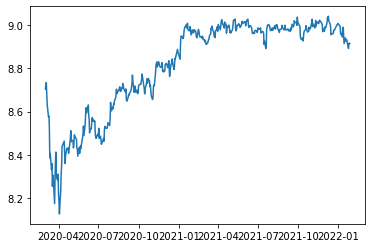

In [32]:
INDEXNXTtrain_logscale = np.log(INDEXNXTtrain)
plt.plot(INDEXNXTtrain_logscale)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

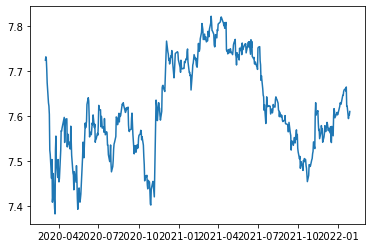

In [33]:
INDEXABFTRAIN_logscale = np.log(INDEXABFTRAIN)
plt.plot(INDEXABFTRAIN_logscale)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

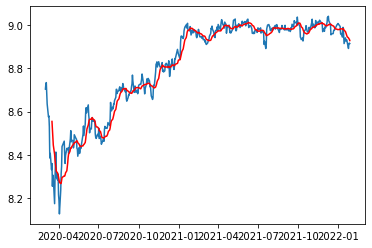

In [35]:
movingaverageNXT = INDEXNXTtrain_logscale.rolling(window=12).mean()
MovingSTD = INDEXNXTtrain_logscale.rolling(window=12).std()
plt.plot(INDEXNXTtrain_logscale)
plt.plot(movingaverageNXT, color='red')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

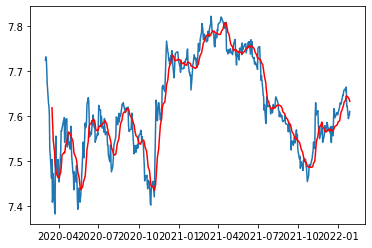

In [36]:
movingaverageABF = INDEXABFTRAIN_logscale.rolling(window=12).mean()
MovingSTDabf = INDEXABFTRAIN_logscale.rolling(window=12).std()
plt.plot(INDEXABFTRAIN_logscale)
plt.plot(movingaverageABF, color='red')

In [37]:
INDEXNXTtrain_logscale_moingaverage = INDEXNXTtrain_logscale - movingaverageNXT
INDEXNXTtrain_logscale_moingaverage.head()

#removing NAN values
INDEXNXTtrain_logscale_moingaverage.dropna(inplace=True)
INDEXNXTtrain_logscale_moingaverage.head(10)

,Adj Close
Date,
2020-03-17,-0.193893
2020-03-18,-0.261503
2020-03-19,-0.174981
2020-03-20,-0.150846
2020-03-23,-0.227572
2020-03-24,-0.080926
2020-03-25,0.015404
2020-03-26,0.069323
2020-03-27,-0.028848


In [38]:
INDEXABFTRAIN_logscale_moingaverage = INDEXABFTRAIN_logscale - movingaverageABF
INDEXABFTRAIN_logscale_moingaverage.head()

#removing NAN values
INDEXABFTRAIN_logscale_moingaverage.dropna(inplace=True)
INDEXABFTRAIN_logscale_moingaverage.head(10)

,Adj Close
Date,
2020-03-17,-0.114936
2020-03-18,-0.183405
2020-03-19,-0.145447
2020-03-20,-0.072607
2020-03-23,-0.124226
2020-03-24,-0.112281
2020-03-25,0.038053
2020-03-26,0.074980
2020-03-27,0.026925


C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

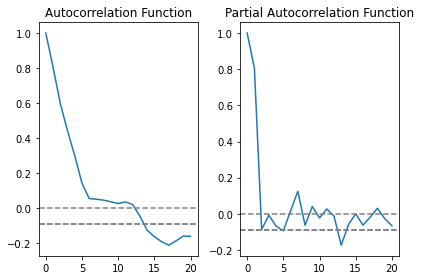

In [44]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(INDEXNXTtrain_logscale_moingaverage, nlags=20)
lag_pacf = pacf(INDEXNXTtrain_logscale_moingaverage, nlags=20, method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(INDEXNXTtrain_logscale_moingaverage)), linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(INDEXNXTtrain_logscale_moingaverage)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(INDEXNXTtrain_logscale_moingaverage)), linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(INDEXNXTtrain_logscale_moingaverage)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'RSS: 0.3317')

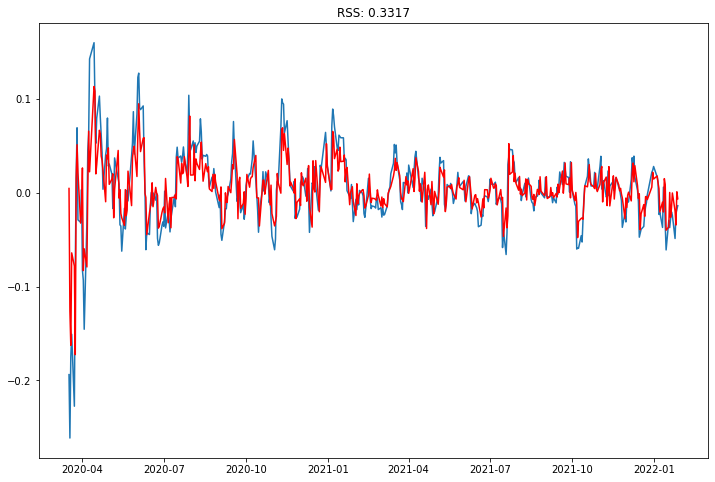

In [66]:
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL with respect to moving average our RSS is 0.3
model = ARIMA(INDEXNXTtrain_logscale_moingaverage, order=(0,0,2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12, 8))
plt.plot(INDEXNXTtrain_logscale_moingaverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-INDEXNXTtrain_logscale_moingaverage['Adj Close'])**2))    

In [65]:
#MA MODEL


C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'RSS: 0.2728')

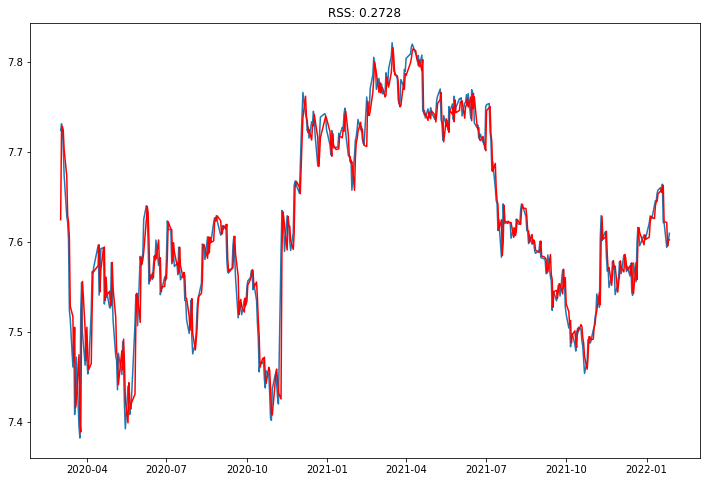

In [64]:
#using our Auto regressive part we have RSS value to be
model = ARIMA(INDEXABFTRAIN_logscale, order=(1,0,1))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12, 8))
plt.plot(INDEXABFTRAIN_logscale)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-INDEXABFTRAIN_logscale['Adj Close'])**2))    

In [68]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

<IPython.core.display.Javascript object>

Date
2020-03-17    0.004624
2020-03-18   -0.126069
2020-03-19   -0.162691
2020-03-20   -0.064061
2020-03-23   -0.078092
dtype: float64


In [69]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2020-03-17    0.004624
2020-03-18   -0.121445
2020-03-19   -0.284136
2020-03-20   -0.348197
2020-03-23   -0.426289
dtype: float64


In [76]:
predictions_ARIMA_log = pd.Series(INDEXABFTRAIN_logscale['Adj Close'], index=INDEXABFTRAIN_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

<IPython.core.display.Javascript object>

Date
2020-03-02    7.723905
2020-03-03    7.731393
2020-03-04    7.726554
2020-03-05    7.704262
2020-03-06    7.674054
dtype: float64

In [92]:
prediction =  prediction_ARIMA.iloc[483:504]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

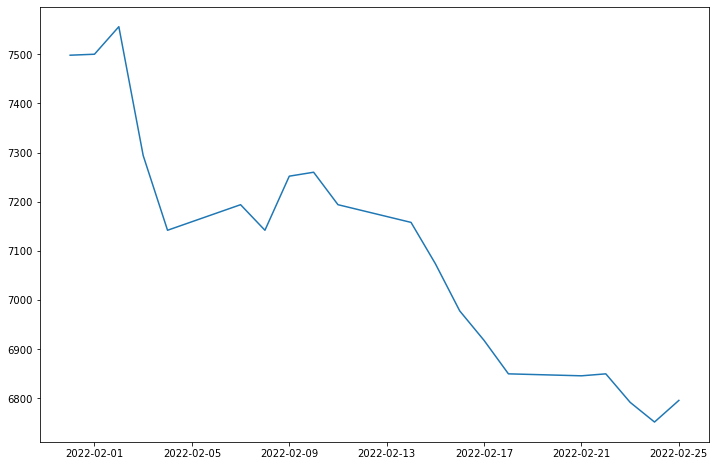

In [93]:
prediction_ARIMA = np.exp(INDEXABFTRAIN_logscale)
plt.figure(figsize=(12, 8))
plt.plot(INDEXNXTTEST)
plt.plot(prediction)

In [79]:
INDEXABFTRAIN_logscale

,Adj Close
Date,
2020-03-02,7.723905
2020-03-03,7.731393
2020-03-04,7.726554
2020-03-05,7.704262
2020-03-06,7.674054
...,...
2022-01-21,7.621685
2022-01-24,7.594130
2022-01-25,7.602401


<IPython.core.display.Javascript object>

C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


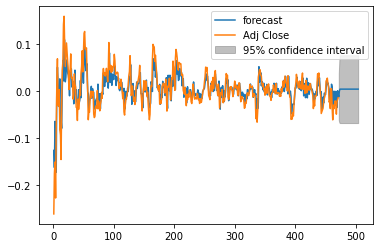

<Figure size 864x576 with 0 Axes>

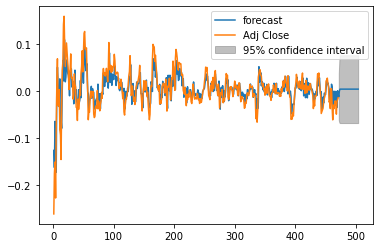

In [84]:
plt.figure(figsize=(12, 8))
results_AR.plot_predict(1,504)
#X=results_ARIMA.forecast(steps=20)

In [102]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

dta = sm.datasetsINDEXABFTRAIN_logscale.sunspots.load_pandas().data[['20 DAY FORECAST FOR NEXT PLC']]
dta.index = pd.DatetimeIndex(start='2020-03-02', end='2022-01-27', freq='A')
res = sm.tsa.ARMA(dta, (3, 0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['2022-01-31':].plot(ax=ax)
fig = res.plot_predict('2022-01-31', '2022-02-25', dynamic=True, ax=ax,
                        plot_insample=False)
plt.show()

AttributeError: 'Dataset' object has no attribute 'INDEXABFTRAIN_logscale'

In [100]:
INDEXNXTTEST.tail()

,Adj Close
Date,
2022-02-21,6846.0
2022-02-22,6850.0
2022-02-23,6792.0
2022-02-24,6752.0
2022-02-25,6796.0


In [103]:
sm.__version__

'0.11.1'

In [104]:
def smooth_level(obs, level, alpha):
    '''returns a exponentially smoothed level assuming no trend or seasonality'''
    return (alpha*obs) + ((1-alpha)*level)

In [108]:
current_obs = 484
last_level = 20
alpha = 0.8

smooth_level(current_obs, last_level, alpha)

391.20000000000005

In [109]:
INDEXNXTtrain.count()

Adj Close    483
dtype: int64

In [112]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [125]:
future = 20

#for SES pass in endog argument as your data
model = ExponentialSmoothing(endog=INDEXNXTtrain['Adj Close'])
results = model.fit()

preds = results.get_forecast(steps=future)

preds.summary_frame(alpha=0.1).head(3)

C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Adj Close,mean,mean_se,mean_ci_lower,mean_ci_upper
483,7428.36387,149.410921,7182.604775,7674.122966
484,7428.36387,208.846777,7084.841491,7771.886250
485,7428.36387,254.775057,7009.296195,7847.431546


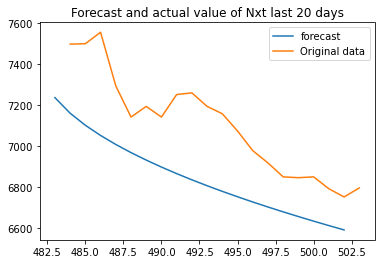

In [126]:
preds.summary_frame(alpha=0.2)['mean_ci_lower'].plot(label='forecast')
NXTTEST['Adj Close'].plot(label='Original data')
plt.title('Forecast and actual value of Nxt last 20 days')
plt.legend()


In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  483
Model:                   ETS(A, N, N)   Log Likelihood               -3103.584
Date:                Tue, 05 Apr 2022   AIC                           6213.167
Time:                        19:58:55   BIC                           6225.707
Sample:                             0   HQIC                          6218.095
                                - 483   Scale                        22323.623
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9767      0.038     25.378      0.000       0.901       1.052
initial_level    6023.9800   7002.235      0.860      0.390   -7700.148    1.97e+04
===================================================================================
Ljung-Box (Q):                       37.60   Jarque-Bera (JB):                67.35
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
ax = INDEXNXTtrain['Adj Close'].plot(figsize=(12,8))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_lower'],
               alpha=0.5,
               label='90%')
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_lower'],
               alpha=0.5,
               label='80%');
forecast_80['mean'].plot(ax=ax, label='forecast', color='red');
results.fittedvalues.plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3);


ValueError: view limit minimum -36401.950000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36401.950000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<ipython-input-190-987facc017fd>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(INDEXNXTtrain, model='additive', freq=30).plot()


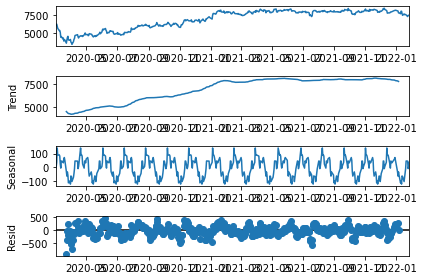

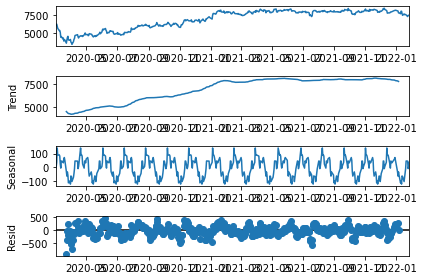

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(INDEXNXTtrain, model='additive', freq=30).plot()

In [129]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [183]:
humodel = ExponentialSmoothing(INDEXNXTtrain['Adj Close'], trend='mul', seasonal='mul', seasonal_periods=25).fit()

C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [184]:
test_pred = humodel.forecast(20)

C:\Users\OgunfowokanPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [185]:
test_pred.head()

483    7392.482176
484    7403.440918
485    7426.371824
486    7422.983455
487    7399.491963
dtype: float64

In [186]:
INDEXNXTTEST.head()

,Adj Close
Date,
2022-01-31,7498.0
2022-02-01,7500.0
2022-02-02,7556.0
2022-02-03,7294.0
2022-02-04,7142.0


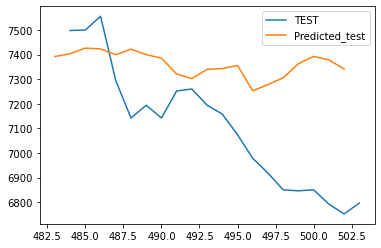

In [187]:
#INDEXNXTtrain['Adj Close'].plot(legend = True, label='Train', figsize=(10,6))
NXTTEST['Adj Close'].plot(legend=True, label='TEST')
test_pred.plot(legend=True, label='Predicted_test')

In [191]:
R = INDEXNXTtrain.resample('M').last().pct_change()
R.head()

,Adj Close
Date,
2020-03-31,NaN
2020-04-30,0.160609
2020-05-31,0.029200
2020-06-30,0.006168
2020-07-31,0.113608


In [192]:
Rm = INDEXABFTRAIN.resample('M').last().pct_change()
Rm.head()

,Adj Close
Date,
2020-03-31,NaN
2020-04-30,0.043275
2020-05-31,-0.037781
2020-06-30,0.051620
2020-07-31,-0.078329


In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
lm = LinearRegression()

In [213]:
data = pd.read_csv(r'C:\Users\OgunfowokanPC\Downloads\NXT.Dd.csv',  index_col='Date')

In [214]:
data.head()

,NXT Adj Close,ABF Adj Close
Date,,
3/2/2020,6023.975098,2261.775146
3/3/2020,6159.929688,2278.773438
3/4/2020,6205.914063,2267.774414
3/5/2020,5916.011719,2217.779541
3/6/2020,5624.109375,2151.786133


In [215]:
log_returns = np.log(data/data.shift())

<IPython.core.display.Javascript object>

In [216]:
log_returns.head()

,NXT Adj Close,ABF Adj Close
Date,,
3/2/2020,NaN,NaN
3/3/2020,0.022318,0.007487
3/4/2020,0.007437,-0.004838
3/5/2020,-0.047840,-0.022292
3/6/2020,-0.050600,-0.030208


In [245]:
cov = log_returns.cov()
var = log_returns['ABF Adj Close'].var()

In [246]:
beta = cov.loc['ABF Adj Close']/var

In [247]:
beta

NXT Adj Close    0.653154
ABF Adj Close    1.000000
Name: ABF Adj Close, dtype: float64

In [254]:
risk_free_return = 0.14
market_return = 0.1158
expected_return = risk_free_return + beta *(market_return - risk_free_return)

In [255]:
expected_return

NXT Adj Close    0.124194
ABF Adj Close    0.115800
Name: ABF Adj Close, dtype: float64

In [225]:
beta = cov.loc['NXT Adj Close', 'ABF Adj Close']/var

In [226]:
beta

0.5239929092036444

In [260]:
NXTNEW = pd.read_csv(r'C:\Users\OgunfowokanPC\Downloads\NXT.L(1).csv', index_col='Date')

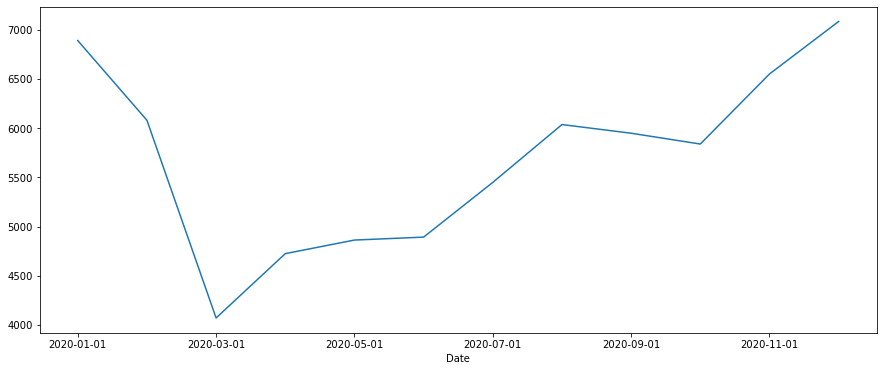

In [262]:
NXTNEW['Adj Close'].plot(figsize=(15,6))